In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

Loading datasets...
Total articles: 44898
Real news: 21417
Fake news: 23481

DATASET EXPLORATION - Checking for Leakage

Subject distribution by label:
label                   0         1
subject                            
Government News  0.066863  0.000000
Middle-east      0.033133  0.000000
News             0.385418  0.000000
US_News          0.033346  0.000000
left-news        0.189898  0.000000
politics         0.291342  0.000000
politicsNews     0.000000  0.526311
worldnews        0.000000  0.473689

Subjects only in FAKE: {'Middle-east', 'News', 'politics', 'Government News', 'US_News', 'left-news'}
Subjects only in REAL: {'worldnews', 'politicsNews'}

------------------------------------------------------------
Sample FAKE article:
------------------------------------------------------------
Subject: News
Title:  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing...

------------------------------------------------------------
Sample REAL article:
-

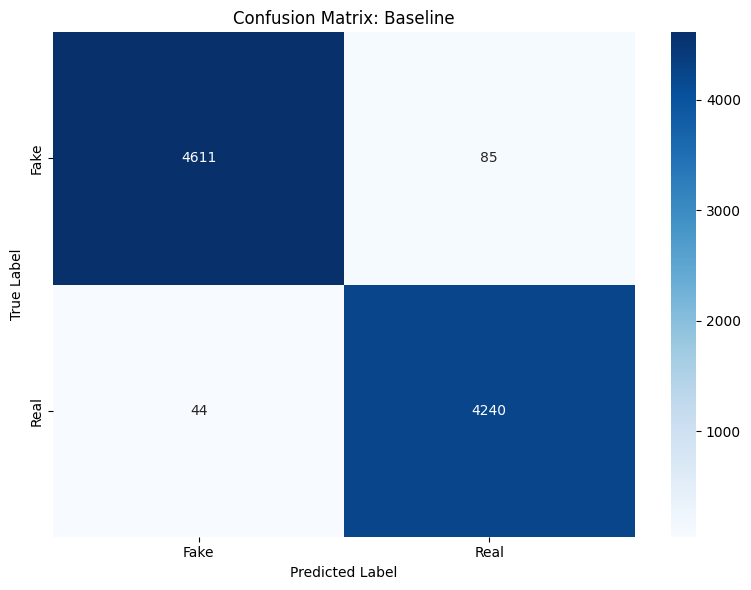


Training Main Approach (Enhanced Features + Random Forest)...
TF-IDF features: 3000
Linguistic features: 11
Total features: 3011

EVALUATION: MAIN APPROACH (Validation Set)

Accuracy: 0.9964 (99.64%)
AUC-ROC: 0.9999

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4697
        Real       1.00      1.00      1.00      4283

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


EVALUATION: MAIN APPROACH (Test Set)

Accuracy: 0.9968 (99.68%)
AUC-ROC: 0.9999

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4696
        Real       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



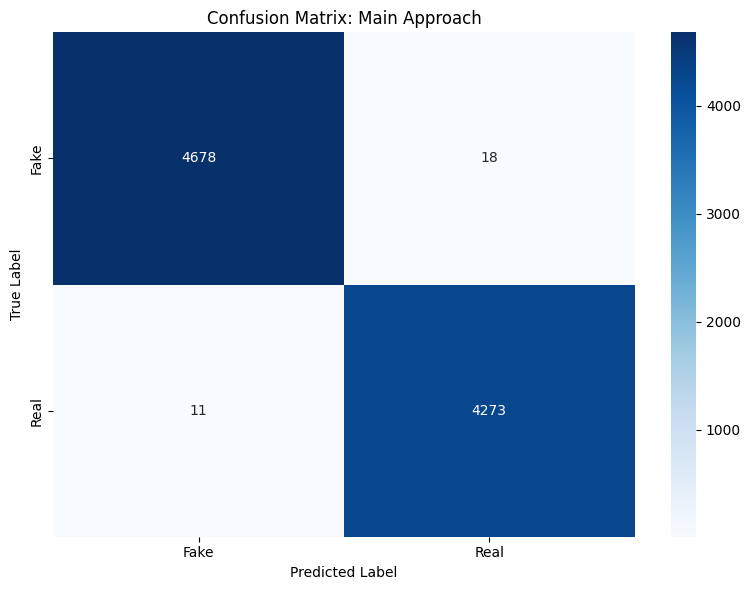


FINAL COMPARISON

Model                                    Val Acc      Test Acc     Test AUC    
------------------------------------------------------------
Baseline (TF-IDF + LogReg)               0.9864      0.9856      0.9988
Main Approach (Enhanced + RF)            0.9964      0.9968      0.9999
------------------------------------------------------------
Improvement                              +0.0100      +0.0111      +0.0011

GENERALIZATION CHECK
Baseline - Val vs Test gap: 0.0008
Main Approach - Val vs Test gap: 0.0003
✓ Baseline generalizes well
✓ Main approach generalizes well


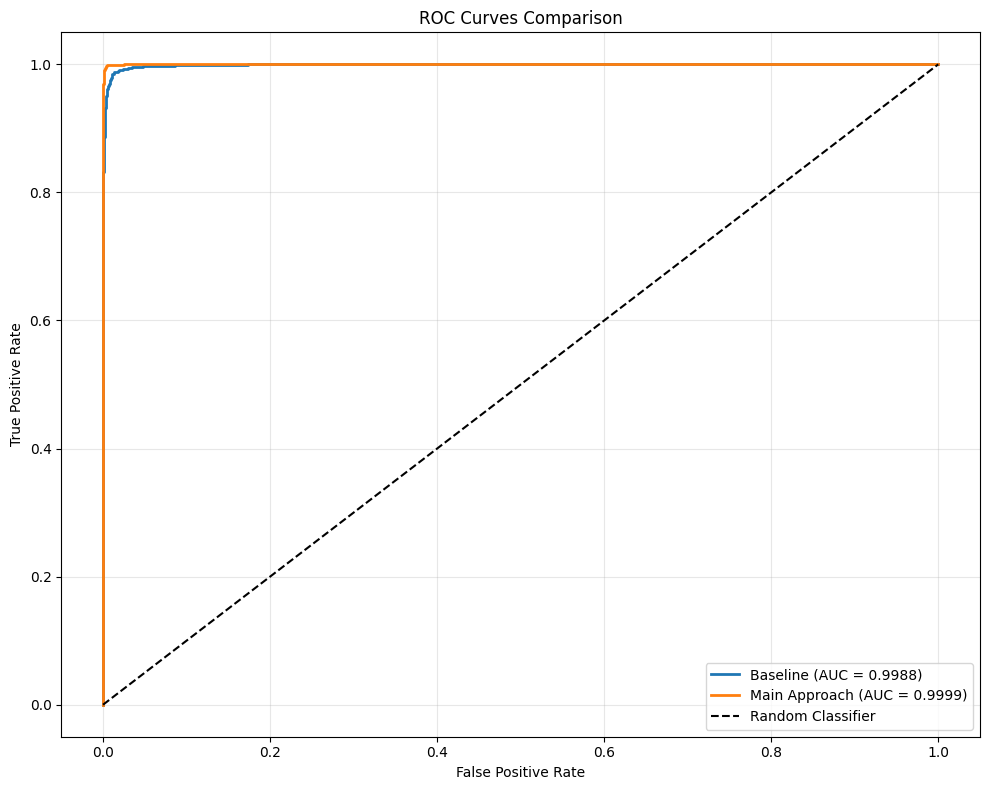

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
# import re
# from collections import Counter
# import warnings
# warnings.filterwarnings('ignore')

# # ============================================================================
# # 1. DATA LOADING AND PREPROCESSING
# # ============================================================================

# def load_and_prepare_data(true_path='True.csv', fake_path='Fake.csv'):
#     """Load both datasets and combine them with labels."""
#     print("Loading datasets...")

#     # Load datasets
#     true_df = pd.read_csv(true_path)
#     fake_df = pd.read_csv(fake_path)

#     # Add labels
#     true_df['label'] = 1  # Real news
#     fake_df['label'] = 0  # Fake news

#     # Combine datasets
#     df = pd.concat([true_df, fake_df], ignore_index=True)

#     # Combine title and text for full article content
#     df['full_text'] = df['title'] + ' ' + df['text']

#     # Basic cleaning
#     df['full_text'] = df['full_text'].fillna('')

#     print(f"Total articles: {len(df)}")
#     print(f"Real news: {sum(df['label'] == 1)}")
#     print(f"Fake news: {sum(df['label'] == 0)}")

#     return df

# def clean_text(text):
#     """Basic text cleaning."""
#     # Remove URLs
#     text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
#     # Remove extra whitespace
#     text = re.sub(r'\s+', ' ', text).strip()
#     return text

# # ============================================================================
# # 2. BASELINE: TF-IDF + LOGISTIC REGRESSION
# # ============================================================================

# class BaselineModel:
#     """Bag-of-Words with TF-IDF and Logistic Regression."""

#     def __init__(self, max_features=5000):
#         self.vectorizer = TfidfVectorizer(
#             max_features=max_features,
#             ngram_range=(1, 1),  # Unigrams only for baseline
#             stop_words='english',
#             lowercase=True
#         )
#         self.model = LogisticRegression(
#             max_iter=1000,
#             random_state=42,
#             C=1.0
#         )

#     def train(self, X_train, y_train):
#         """Train the baseline model."""
#         print("\nTraining Baseline Model (TF-IDF + Logistic Regression)...")

#         # Vectorize text
#         X_train_tfidf = self.vectorizer.fit_transform(X_train)

#         # Train model
#         self.model.fit(X_train_tfidf, y_train)

#         print(f"Vocabulary size: {len(self.vectorizer.vocabulary_)}")

#     def predict(self, X_test):
#         """Make predictions."""
#         X_test_tfidf = self.vectorizer.transform(X_test)
#         return self.model.predict(X_test_tfidf)

#     def predict_proba(self, X_test):
#         """Get prediction probabilities."""
#         X_test_tfidf = self.vectorizer.transform(X_test)
#         return self.model.predict_proba(X_test_tfidf)[:, 1]

#     def get_top_features(self, n=20):
#         """Get most predictive features for each class."""
#         feature_names = self.vectorizer.get_feature_names_out()
#         coef = self.model.coef_[0]

#         # Top features for fake news (negative coefficients)
#         fake_indices = np.argsort(coef)[:n]
#         fake_features = [(feature_names[i], coef[i]) for i in fake_indices]

#         # Top features for real news (positive coefficients)
#         real_indices = np.argsort(coef)[-n:][::-1]
#         real_features = [(feature_names[i], coef[i]) for i in real_indices]

#         return fake_features, real_features

# # ============================================================================
# # 3. MAIN APPROACH: ENHANCED FEATURES + RANDOM FOREST
# # ============================================================================

# class EnhancedFeatureExtractor:
#     """Extract linguistic and stylistic features beyond TF-IDF."""

#     def extract_features(self, texts):
#         """Extract multiple feature types from texts."""
#         features = []

#         for text in texts:
#             feat_dict = {}

#             # 1. Text statistics
#             words = text.split()
#             sentences = text.split('.')

#             feat_dict['word_count'] = len(words)
#             feat_dict['sentence_count'] = len(sentences)
#             feat_dict['avg_word_length'] = np.mean([len(w) for w in words]) if words else 0
#             feat_dict['avg_sentence_length'] = len(words) / len(sentences) if sentences else 0

#             # 2. Punctuation patterns
#             feat_dict['exclamation_count'] = text.count('!')
#             feat_dict['question_count'] = text.count('?')
#             feat_dict['quote_count'] = text.count('"')
#             feat_dict['all_caps_ratio'] = sum(1 for c in text if c.isupper()) / len(text) if text else 0

#             # 3. Sentiment indicators (simple word-based)
#             emotional_words = ['shocking', 'amazing', 'unbelievable', 'incredible', 'outrageous',
#                              'stunning', 'devastating', 'breaking', 'exclusive', 'bombshell']
#             feat_dict['emotional_word_count'] = sum(text.lower().count(word) for word in emotional_words)

#             # 4. Named entity proxies (capitalized words as rough estimate)
#             capitalized = sum(1 for word in words if word and word[0].isupper())
#             feat_dict['capitalized_ratio'] = capitalized / len(words) if words else 0

#             # 5. Common fake news phrases
#             clickbait_phrases = ['you won\'t believe', 'what happened next', 'doctors hate',
#                                'one weird trick', 'shocking truth', 'they don\'t want']
#             feat_dict['clickbait_phrase_count'] = sum(phrase in text.lower() for phrase in clickbait_phrases)

#             features.append(feat_dict)

#         return pd.DataFrame(features)

# class MainApproachModel:
#     """Enhanced features with TF-IDF combined using Random Forest."""

#     def __init__(self, max_tfidf_features=3000):
#         # TF-IDF with bigrams
#         self.tfidf_vectorizer = TfidfVectorizer(
#             max_features=max_tfidf_features,
#             ngram_range=(1, 2),  # Include bigrams
#             stop_words='english',
#             lowercase=True
#         )

#         # Enhanced feature extractor
#         self.feature_extractor = EnhancedFeatureExtractor()

#         # Random Forest classifier
#         self.model = RandomForestClassifier(
#             n_estimators=100,
#             max_depth=20,
#             random_state=42,
#             n_jobs=-1
#         )

#     def train(self, X_train, y_train):
#         """Train the enhanced model."""
#         print("\nTraining Main Approach (Enhanced Features + Random Forest)...")

#         # Extract TF-IDF features
#         X_train_tfidf = self.tfidf_vectorizer.fit_transform(X_train)

#         # Extract linguistic features
#         X_train_ling = self.feature_extractor.extract_features(X_train)

#         # Combine features
#         X_train_combined = np.hstack([
#             X_train_tfidf.toarray(),
#             X_train_ling.values
#         ])

#         print(f"TF-IDF features: {X_train_tfidf.shape[1]}")
#         print(f"Linguistic features: {X_train_ling.shape[1]}")
#         print(f"Total features: {X_train_combined.shape[1]}")

#         # Train model
#         self.model.fit(X_train_combined, y_train)

#     def predict(self, X_test):
#         """Make predictions."""
#         X_test_tfidf = self.tfidf_vectorizer.transform(X_test)
#         X_test_ling = self.feature_extractor.extract_features(X_test)
#         X_test_combined = np.hstack([
#             X_test_tfidf.toarray(),
#             X_test_ling.values
#         ])
#         return self.model.predict(X_test_combined)

#     def predict_proba(self, X_test):
#         """Get prediction probabilities."""
#         X_test_tfidf = self.tfidf_vectorizer.transform(X_test)
#         X_test_ling = self.feature_extractor.extract_features(X_test)
#         X_test_combined = np.hstack([
#             X_test_tfidf.toarray(),
#             X_test_ling.values
#         ])
#         return self.model.predict_proba(X_test_combined)[:, 1]

#     def get_feature_importance(self, n=15):
#         """Get top important features."""
#         # Get linguistic feature names
#         ling_feature_names = ['word_count', 'sentence_count', 'avg_word_length',
#                              'avg_sentence_length', 'exclamation_count', 'question_count',
#                              'quote_count', 'all_caps_ratio', 'emotional_word_count',
#                              'capitalized_ratio', 'clickbait_phrase_count']

#         # Get TF-IDF feature names
#         tfidf_feature_names = list(self.tfidf_vectorizer.get_feature_names_out())

#         # Combine all feature names
#         all_feature_names = tfidf_feature_names + ling_feature_names

#         # Get feature importances
#         importances = self.model.feature_importances_

#         # Get top N
#         top_indices = np.argsort(importances)[-n:][::-1]
#         top_features = [(all_feature_names[i], importances[i]) for i in top_indices]

#         return top_features

# # ============================================================================
# # 4. EVALUATION FUNCTIONS
# # ============================================================================

# def evaluate_model(y_true, y_pred, y_pred_proba, model_name="Model"):
#     """Comprehensive model evaluation."""
#     print(f"\n{'='*60}")
#     print(f"EVALUATION: {model_name}")
#     print(f"{'='*60}")

#     # Accuracy
#     accuracy = accuracy_score(y_true, y_pred)
#     print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

#     # AUC
#     auc = roc_auc_score(y_true, y_pred_proba)
#     print(f"AUC-ROC: {auc:.4f}")

#     # Classification report
#     print(f"\nClassification Report:")
#     print(classification_report(y_true, y_pred, target_names=['Fake', 'Real']))

#     return accuracy, auc

# def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
#     """Plot confusion matrix."""
#     cm = confusion_matrix(y_true, y_pred)

#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=['Fake', 'Real'],
#                 yticklabels=['Fake', 'Real'])
#     plt.title(f'Confusion Matrix: {model_name}')
#     plt.ylabel('True Label')
#     plt.xlabel('Predicted Label')
#     plt.tight_layout()
#     plt.show()

# def plot_roc_curves(models_data):
#     """Plot ROC curves for multiple models."""
#     plt.figure(figsize=(10, 8))

#     for model_name, y_true, y_pred_proba in models_data:
#         fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
#         auc = roc_auc_score(y_true, y_pred_proba)
#         plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})', linewidth=2)

#     plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curves Comparison')
#     plt.legend()
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.show()

# # ============================================================================
# # 5. MAIN EXECUTION
# # ============================================================================

# def explore_dataset(df):
#     """Explore potential data leakage issues."""
#     print("\n" + "="*60)
#     print("DATASET EXPLORATION - Checking for Leakage")
#     print("="*60)

#     # Check subject distribution
#     print("\nSubject distribution by label:")
#     subject_dist = pd.crosstab(df['subject'], df['label'], normalize='columns')
#     print(subject_dist)

#     # Check if certain subjects only appear in one class
#     fake_subjects = set(df[df['label']==0]['subject'].unique())
#     real_subjects = set(df[df['label']==1]['subject'].unique())
#     print(f"\nSubjects only in FAKE: {fake_subjects - real_subjects}")
#     print(f"Subjects only in REAL: {real_subjects - fake_subjects}")

#     # Sample articles from each class
#     print("\n" + "-"*60)
#     print("Sample FAKE article:")
#     print("-"*60)
#     fake_sample = df[df['label']==0].iloc[0]
#     print(f"Subject: {fake_sample['subject']}")
#     print(f"Title: {fake_sample['title'][:100]}...")

#     print("\n" + "-"*60)
#     print("Sample REAL article:")
#     print("-"*60)
#     real_sample = df[df['label']==1].iloc[0]
#     print(f"Subject: {real_sample['subject']}")
#     print(f"Title: {real_sample['title'][:100]}...")

# def main():
#     """Main execution pipeline."""

#     # Load data
#     df = load_and_prepare_data('True.csv', 'Fake.csv')

#     # Explore dataset for potential issues
#     explore_dataset(df)

#     # Clean text
#     df['full_text'] = df['full_text'].apply(clean_text)

#     # Split data: 60% train, 20% validation, 20% test
#     X = df['full_text'].values
#     y = df['label'].values

#     # First split: 80% train+val, 20% test
#     X_temp, X_test, y_temp, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )

#     # Second split: 75% of temp = train, 25% of temp = val
#     # This gives us 60% train, 20% val, 20% test overall
#     X_train, X_val, y_train, y_val = train_test_split(
#         X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
#     )

#     print(f"\n{'='*60}")
#     print("DATA SPLIT")
#     print(f"{'='*60}")
#     print(f"Training set: {len(X_train)} articles ({len(X_train)/len(X)*100:.1f}%)")
#     print(f"Validation set: {len(X_val)} articles ({len(X_val)/len(X)*100:.1f}%)")
#     print(f"Test set: {len(X_test)} articles ({len(X_test)/len(X)*100:.1f}%)")

#     # ========================================================================
#     # BASELINE MODEL
#     # ========================================================================

#     baseline = BaselineModel(max_features=5000)
#     baseline.train(X_train, y_train)

#     # Evaluate on VALIDATION set first
#     print("\n" + "="*60)
#     print("VALIDATION SET PERFORMANCE")
#     print("="*60)

#     y_pred_val_baseline = baseline.predict(X_val)
#     y_pred_proba_val_baseline = baseline.predict_proba(X_val)

#     baseline_val_acc, baseline_val_auc = evaluate_model(
#         y_val, y_pred_val_baseline, y_pred_proba_val_baseline,
#         "BASELINE (Validation Set)"
#     )

#     # Evaluate on TEST set
#     print("\n" + "="*60)
#     print("TEST SET PERFORMANCE")
#     print("="*60)

#     y_pred_baseline = baseline.predict(X_test)
#     y_pred_proba_baseline = baseline.predict_proba(X_test)

#     baseline_acc, baseline_auc = evaluate_model(
#         y_test, y_pred_baseline, y_pred_proba_baseline,
#         "BASELINE (Test Set)"
#     )

#     # Show top features
#     print("\nTop Predictive Features:")
#     fake_feat, real_feat = baseline.get_top_features(10)
#     print("\nTop 10 words indicating FAKE news:")
#     for word, coef in fake_feat:
#         print(f"  {word}: {coef:.4f}")
#     print("\nTop 10 words indicating REAL news:")
#     for word, coef in real_feat:
#         print(f"  {word}: {coef:.4f}")

#     plot_confusion_matrix(y_test, y_pred_baseline, "Baseline")

#     # ========================================================================
#     # MAIN APPROACH MODEL
#     # ========================================================================

#     main_approach = MainApproachModel(max_tfidf_features=3000)
#     main_approach.train(X_train, y_train)

#     # Evaluate on VALIDATION set
#     y_pred_val_main = main_approach.predict(X_val)
#     y_pred_proba_val_main = main_approach.predict_proba(X_val)

#     main_val_acc, main_val_auc = evaluate_model(
#         y_val, y_pred_val_main, y_pred_proba_val_main,
#         "MAIN APPROACH (Validation Set)"
#     )

#     # Evaluate on TEST set
#     y_pred_main = main_approach.predict(X_test)
#     y_pred_proba_main = main_approach.predict_proba(X_test)

#     main_acc, main_auc = evaluate_model(
#         y_test, y_pred_main, y_pred_proba_main,
#         "MAIN APPROACH (Test Set)"
#     )

#     # Show top features
#     print("\nTop 15 Most Important Features:")
#     top_features = main_approach.get_feature_importance(15)
#     for i, (feat, importance) in enumerate(top_features, 1):
#         print(f"  {i}. {feat}: {importance:.4f}")

#     plot_confusion_matrix(y_test, y_pred_main, "Main Approach")

#     # ========================================================================
#     # COMPARISON
#     # ========================================================================

#     print(f"\n{'='*60}")
#     print("FINAL COMPARISON")
#     print(f"{'='*60}")
#     print(f"\n{'Model':<40} {'Val Acc':<12} {'Test Acc':<12} {'Test AUC':<12}")
#     print(f"{'-'*60}")
#     print(f"{'Baseline (TF-IDF + LogReg)':<40} {baseline_val_acc:.4f}      {baseline_acc:.4f}      {baseline_auc:.4f}")
#     print(f"{'Main Approach (Enhanced + RF)':<40} {main_val_acc:.4f}      {main_acc:.4f}      {main_auc:.4f}")
#     print(f"{'-'*60}")
#     print(f"{'Improvement':<40} {main_val_acc - baseline_val_acc:+.4f}      {main_acc - baseline_acc:+.4f}      {main_auc - baseline_auc:+.4f}")

#     # Analyze if validation and test are similar (checking for overfitting)
#     print(f"\n{'='*60}")
#     print("GENERALIZATION CHECK")
#     print(f"{'='*60}")
#     print(f"Baseline - Val vs Test gap: {abs(baseline_val_acc - baseline_acc):.4f}")
#     print(f"Main Approach - Val vs Test gap: {abs(main_val_acc - main_acc):.4f}")
#     if abs(baseline_val_acc - baseline_acc) < 0.02:
#         print("✓ Baseline generalizes well")
#     else:
#         print("⚠ Baseline may be overfitting")

#     if abs(main_val_acc - main_acc) < 0.02:
#         print("✓ Main approach generalizes well")
#     else:
#         print("⚠ Main approach may be overfitting")

#     # Plot ROC curves
#     plot_roc_curves([
#         ("Baseline", y_test, y_pred_proba_baseline),
#         ("Main Approach", y_test, y_pred_proba_main)
#     ])

#     return baseline, main_approach, X_train, X_val, X_test, y_train, y_val, y_test

# # Run the pipeline
# if __name__ == "__main__":
#     baseline_model, main_model, X_train, X_val, X_test, y_train, y_val, y_test = main()

fixing leaky code

In [ ]:
# import re
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# from scipy.sparse import hstack

# # ============================================================
# # CONFIGURATION
# # ============================================================

# FAKE_PATH = "Fake.csv"  # Update with your path
# TRUE_PATH = "True.csv"  # Update with your path

# # Source identifiers and artifacts to remove
# LEAKY_PATTERNS = [
#     # News agency tags and bylines
#     r'\(Reuters\)',
#     r'\bReuters\b',
#     r'\bAFP\b',
#     r'\bAP\b',
#     r'\bAssociated Press\b',
#     r'WASHINGTON\s*\(',
#     r'NEW YORK\s*\(',
#     r'LONDON\s*\(',
#     # Common location-based leads: "CITY (Reuters) -"
#     r'^[A-Z]{2,}[\s,]+[A-Z][a-z]+\s*\([^)]+\)\s*[-–—]?\s*',
#     r'^[A-Z][a-z]+\s*\([^)]+\)\s*[-–—]\s*',
#     # Clickbait artifacts
#     r'\[video\]',
#     r'\[image\]',
#     r'featured image',
#     r'FEATURED IMAGE',
#     r'via\s+\w+\s*$',
#     r'READ MORE:.*$',
#     r'WATCH:.*$',
#     r'Photo:.*$',
#     # Social media artifacts
#     r'SHARE\s+THIS',
#     r'CLICK HERE',
#     r'Subscribe\s+to\s+our',
# ]

# LEAKY_REGEX = re.compile('|'.join(LEAKY_PATTERNS), re.IGNORECASE | re.MULTILINE)

# LEAKY_WORDS = {
#     'reuters', 'afp', 'ap', 'politicsnews', 'worldnews',
#     'left-news', 'government news', 'middle-east', 'us_news'
# }

# # ============================================================
# # PREPROCESSING FUNCTIONS
# # ============================================================

# def clean_text(text):
#     """Remove source identifiers and other leaky patterns from text."""
#     if pd.isna(text):
#         return ""
#     text = str(text)
#     text = LEAKY_REGEX.sub(' ', text)
#     for word in LEAKY_WORDS:
#         pattern = r'\b' + re.escape(word) + r'\b'
#         text = re.sub(pattern, ' ', text, flags=re.IGNORECASE)
#     text = re.sub(r'\s+', ' ', text).strip()
#     return text

# def extract_linguistic_features(texts):
#     """Extract linguistic features that may indicate fake news."""
#     features = []
#     for text in texts:
#         text = str(text)
#         words = text.split()
#         sentences = re.split(r'[.!?]+', text)

#         feat = {
#             'char_count': len(text),
#             'word_count': len(words),
#             'avg_word_length': np.mean([len(w) for w in words]) if words else 0,
#             'sentence_count': len([s for s in sentences if s.strip()]),
#             'exclamation_count': text.count('!'),
#             'question_count': text.count('?'),
#             'all_caps_ratio': sum(1 for w in words if w.isupper() and len(w) > 1) / len(words) if words else 0,
#             'digit_ratio': sum(c.isdigit() for c in text) / len(text) if text else 0,
#             'unique_word_ratio': len(set(w.lower() for w in words)) / len(words) if words else 0,
#             'avg_sentence_length': len(words) / len([s for s in sentences if s.strip()]) if sentences else 0,
#             'quote_count': text.count('"') + text.count("'"),
#         }
#         features.append(feat)
#     return pd.DataFrame(features)

# def verify_no_leakage(df, text_column='combined_text'):
#     """Check that obvious leaky terms have been removed."""
#     print("\nVerifying leakage removal...")
#     leaky_terms = ['reuters', 'afp', '(reuters)', 'politicsnews', 'worldnews']
#     all_clean = True
#     for term in leaky_terms:
#         count = df[text_column].str.lower().str.contains(term, regex=False).sum()
#         status = "✓" if count == 0 else "✗"
#         if count > 0:
#             all_clean = False
#         print(f"  {status} '{term}': {count} occurrences")
#     return all_clean

# # ============================================================
# # MAIN PIPELINE
# # ============================================================

# def main():
#     # Load datasets
#     print("Loading datasets...")
#     fake_df = pd.read_csv(FAKE_PATH)
#     real_df = pd.read_csv(TRUE_PATH)

#     fake_df['label'] = 0
#     real_df['label'] = 1

#     df = pd.concat([fake_df, real_df], ignore_index=True)
#     print(f"Total articles: {len(df)}")
#     print(f"Real news: {len(real_df)}")
#     print(f"Fake news: {len(fake_df)}")

#     # ============================================================
#     # PREPROCESSING - Remove leakage
#     # ============================================================
#     print("\n" + "="*60)
#     print("PREPROCESSING - Removing Data Leakage")
#     print("="*60)

#     # Drop subject column (perfect class separator)
#     if 'subject' in df.columns:
#         print("Dropping 'subject' column (causes leakage)")
#         df = df.drop(columns=['subject'])

#     # Clean text and title
#     print("Cleaning text content...")
#     df['text'] = df['text'].apply(clean_text)
#     df['title'] = df['title'].apply(clean_text)
#     df['combined_text'] = df['title'] + ' ' + df['text']

#     # Remove articles that became too short
#     original_len = len(df)
#     df = df[df['combined_text'].str.len() > 50]
#     print(f"Removed {original_len - len(df)} articles too short after cleaning")

#     # Verify leakage removal
#     verify_no_leakage(df)

#     # ============================================================
#     # TRAIN/VAL/TEST SPLIT
#     # ============================================================
#     print("\n" + "="*60)
#     print("DATA SPLIT")
#     print("="*60)

#     train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df['label'])
#     val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

#     print(f"Training set: {len(train_df)} articles ({len(train_df)/len(df)*100:.1f}%)")
#     print(f"Validation set: {len(val_df)} articles ({len(val_df)/len(df)*100:.1f}%)")
#     print(f"Test set: {len(test_df)} articles ({len(test_df)/len(df)*100:.1f}%)")

#     X_train = train_df['combined_text']
#     X_val = val_df['combined_text']
#     X_test = test_df['combined_text']
#     y_train = train_df['label']
#     y_val = val_df['label']
#     y_test = test_df['label']

#     # ============================================================
#     # BASELINE MODEL: TF-IDF + Logistic Regression
#     # ============================================================
#     print("\n" + "="*60)
#     print("BASELINE MODEL (TF-IDF + Logistic Regression)")
#     print("="*60)

#     tfidf_baseline = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,1))
#     X_train_tfidf = tfidf_baseline.fit_transform(X_train)
#     X_val_tfidf = tfidf_baseline.transform(X_val)
#     X_test_tfidf = tfidf_baseline.transform(X_test)

#     baseline_model = LogisticRegression(max_iter=1000, random_state=42)
#     baseline_model.fit(X_train_tfidf, y_train)

#     # Evaluate baseline
#     val_pred_base = baseline_model.predict(X_val_tfidf)
#     val_prob_base = baseline_model.predict_proba(X_val_tfidf)[:, 1]
#     test_pred_base = baseline_model.predict(X_test_tfidf)
#     test_prob_base = baseline_model.predict_proba(X_test_tfidf)[:, 1]

#     print("\nValidation Set:")
#     print(f"  Accuracy: {accuracy_score(y_val, val_pred_base):.4f}")
#     print(f"  AUC-ROC: {roc_auc_score(y_val, val_prob_base):.4f}")

#     print("\nTest Set:")
#     print(f"  Accuracy: {accuracy_score(y_test, test_pred_base):.4f}")
#     print(f"  AUC-ROC: {roc_auc_score(y_test, test_prob_base):.4f}")
#     print("\nClassification Report (Test):")
#     print(classification_report(y_test, test_pred_base, target_names=['Fake', 'Real']))

#     # Top features
#     feature_names = tfidf_baseline.get_feature_names_out()
#     coefs = baseline_model.coef_[0]
#     top_fake = np.argsort(coefs)[:10]
#     top_real = np.argsort(coefs)[-10:][::-1]

#     print("Top 10 words indicating FAKE news:")
#     for idx in top_fake:
#         print(f"  {feature_names[idx]}: {coefs[idx]:.4f}")
#     print("\nTop 10 words indicating REAL news:")
#     for idx in top_real:
#         print(f"  {feature_names[idx]}: {coefs[idx]:.4f}")

#     # ============================================================
#     # MAIN MODEL: TF-IDF + Linguistic Features + Random Forest
#     # ============================================================
#     print("\n" + "="*60)
#     print("MAIN MODEL (TF-IDF + Linguistic Features + Random Forest)")
#     print("="*60)

#     # TF-IDF features
#     tfidf_main = TfidfVectorizer(max_features=3000, stop_words='english', ngram_range=(1,2))
#     X_train_tfidf_main = tfidf_main.fit_transform(X_train)
#     X_val_tfidf_main = tfidf_main.transform(X_val)
#     X_test_tfidf_main = tfidf_main.transform(X_test)

#     # Linguistic features
#     print("Extracting linguistic features...")
#     ling_train = extract_linguistic_features(X_train)
#     ling_val = extract_linguistic_features(X_val)
#     ling_test = extract_linguistic_features(X_test)

#     # Combine features
#     X_train_combined = hstack([X_train_tfidf_main, ling_train.values])
#     X_val_combined = hstack([X_val_tfidf_main, ling_val.values])
#     X_test_combined = hstack([X_test_tfidf_main, ling_test.values])

#     print(f"TF-IDF features: {X_train_tfidf_main.shape[1]}")
#     print(f"Linguistic features: {ling_train.shape[1]}")
#     print(f"Total features: {X_train_combined.shape[1]}")

#     # Train Random Forest
#     main_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
#     main_model.fit(X_train_combined, y_train)

#     # Evaluate main model
#     val_pred_main = main_model.predict(X_val_combined)
#     val_prob_main = main_model.predict_proba(X_val_combined)[:, 1]
#     test_pred_main = main_model.predict(X_test_combined)
#     test_prob_main = main_model.predict_proba(X_test_combined)[:, 1]

#     print("\nValidation Set:")
#     print(f"  Accuracy: {accuracy_score(y_val, val_pred_main):.4f}")
#     print(f"  AUC-ROC: {roc_auc_score(y_val, val_prob_main):.4f}")

#     print("\nTest Set:")
#     print(f"  Accuracy: {accuracy_score(y_test, test_pred_main):.4f}")
#     print(f"  AUC-ROC: {roc_auc_score(y_test, test_prob_main):.4f}")
#     print("\nClassification Report (Test):")
#     print(classification_report(y_test, test_pred_main, target_names=['Fake', 'Real']))

#     # Feature importance
#     feature_names_main = list(tfidf_main.get_feature_names_out()) + list(ling_train.columns)
#     importances = main_model.feature_importances_
#     top_indices = np.argsort(importances)[-15:][::-1]

#     print("\nTop 15 Most Important Features:")
#     for i, idx in enumerate(top_indices):
#         print(f"  {i+1}. {feature_names_main[idx]}: {importances[idx]:.4f}")

#     # ============================================================
#     # FINAL COMPARISON
#     # ============================================================
#     print("\n" + "="*60)
#     print("FINAL COMPARISON")
#     print("="*60)

#     base_val_acc = accuracy_score(y_val, val_pred_base)
#     base_test_acc = accuracy_score(y_test, test_pred_base)
#     base_test_auc = roc_auc_score(y_test, test_prob_base)

#     main_val_acc = accuracy_score(y_val, val_pred_main)
#     main_test_acc = accuracy_score(y_test, test_pred_main)
#     main_test_auc = roc_auc_score(y_test, test_prob_main)

#     print(f"\n{'Model':<45} {'Val Acc':<12} {'Test Acc':<12} {'Test AUC':<12}")
#     print("-"*80)
#     print(f"{'Baseline (TF-IDF + LogReg)':<45} {base_val_acc:<12.4f} {base_test_acc:<12.4f} {base_test_auc:<12.4f}")
#     print(f"{'Main Approach (Enhanced + RF)':<45} {main_val_acc:<12.4f} {main_test_acc:<12.4f} {main_test_auc:<12.4f}")
#     print("-"*80)
#     print(f"{'Improvement':<45} {main_val_acc-base_val_acc:+<12.4f} {main_test_acc-base_test_acc:+<12.4f} {main_test_auc-base_test_auc:+<12.4f}")

#     print("\n" + "="*60)
#     print("GENERALIZATION CHECK")
#     print("="*60)
#     print(f"Baseline - Val vs Test gap: {abs(base_val_acc - base_test_acc):.4f}")
#     print(f"Main Approach - Val vs Test gap: {abs(main_val_acc - main_test_acc):.4f}")

# if __name__ == "__main__":
#     main()

Loading datasets...
Total articles: 44898
Real news: 21417
Fake news: 23481

PREPROCESSING - Removing Data Leakage
Dropping 'subject' column (causes leakage)
Cleaning text content...
Removed 27 articles too short after cleaning

Verifying leakage removal...
  ✗ 'reuters': 19 occurrences
  ✗ 'afp': 10 occurrences
  ✓ '(reuters)': 0 occurrences
  ✓ 'politicsnews': 0 occurrences
  ✗ 'worldnews': 3 occurrences

DATA SPLIT
Training set: 26922 articles (60.0%)
Validation set: 8974 articles (20.0%)
Test set: 8975 articles (20.0%)

BASELINE MODEL (TF-IDF + Logistic Regression)

Validation Set:
  Accuracy: 0.9739
  AUC-ROC: 0.9966

Test Set:
  Accuracy: 0.9736
  AUC-ROC: 0.9962

Classification Report (Test):
              precision    recall  f1-score   support

        Fake       0.98      0.97      0.97      4691
        Real       0.97      0.98      0.97      4284

    accuracy                           0.97      8975
   macro avg       0.97      0.97      0.97      8975
weighted avg       

pivot

In [ ]:
# import pandas as pd
# import numpy as np
# import re
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, f1_score
# from scipy.sparse import hstack

# # ============================================================
# # LOAD LIAR DATASET FROM HUGGING FACE
# # ============================================================

# def load_liar_dataset():
#     """Load LIAR dataset from Hugging Face."""
#     from datasets import load_dataset

#     # Try LIAR2 first, fall back to original LIAR
#     try:
#         print("Attempting to load LIAR2 dataset...")
#         dataset = load_dataset("chengxuphd/liar2")
#     except:
#         print("LIAR2 not available, loading original LIAR...")
#         dataset = load_dataset("liar")

#     train_df = pd.DataFrame(dataset['train'])
#     val_df = pd.DataFrame(dataset['validation'])
#     test_df = pd.DataFrame(dataset['test'])

#     # Print columns to see what we have
#     print(f"Available columns: {train_df.columns.tolist()}")

#     return train_df, val_df, test_df

# # ============================================================
# # LABEL MAPPING
# # ============================================================

# LABEL_MAP_BINARY = {
#     'pants-fire': 0,
#     'false': 0,
#     'barely-true': 0,
#     'half-true': 1,
#     'mostly-true': 1,
#     'true': 1,
#     # Integer mappings (some datasets use these)
#     0: 0,  # pants-fire
#     1: 0,  # false
#     2: 0,  # barely-true
#     3: 1,  # half-true
#     4: 1,  # mostly-true
#     5: 1,  # true
# }

# def map_labels(df, label_col='label'):
#     """Map labels to binary (0=fake, 1=real)."""
#     df = df.copy()
#     df['label_numeric'] = df[label_col].map(LABEL_MAP_BINARY)
#     df = df.dropna(subset=['label_numeric'])
#     df['label_numeric'] = df['label_numeric'].astype(int)
#     return df

# # ============================================================
# # FEATURE EXTRACTION
# # ============================================================

# def extract_linguistic_features(texts):
#     """Extract linguistic features from statements."""
#     features = []
#     for text in texts:
#         text = str(text) if pd.notna(text) else ""
#         words = text.split()
#         sentences = re.split(r'[.!?]+', text)

#         feat = {
#             'char_count': len(text),
#             'word_count': len(words),
#             'avg_word_length': np.mean([len(w) for w in words]) if words else 0,
#             'sentence_count': len([s for s in sentences if s.strip()]),
#             'exclamation_count': text.count('!'),
#             'question_count': text.count('?'),
#             'all_caps_ratio': sum(1 for w in words if w.isupper() and len(w) > 1) / len(words) if words else 0,
#             'digit_ratio': sum(c.isdigit() for c in text) / len(text) if text else 0,
#             'unique_word_ratio': len(set(w.lower() for w in words)) / len(words) if words else 0,
#             'quote_count': text.count('"') + text.count("'"),
#             'number_count': len(re.findall(r'\d+', text)),
#             'superlative_count': len(re.findall(r'\b(best|worst|most|least|biggest|smallest|greatest)\b', text.lower())),
#         }
#         features.append(feat)
#     return pd.DataFrame(features)

# def extract_metadata_features(df):
#     """Extract features from speaker metadata."""
#     features = pd.DataFrame(index=df.index)

#     # Find the count columns (different datasets name them differently)
#     count_cols = {
#         'barely_true': None,
#         'false': None,
#         'half_true': None,
#         'mostly_true': None,
#         'pants_fire': None
#     }

#     for col in df.columns:
#         col_lower = col.lower().replace('-', '_').replace(' ', '_')
#         if 'barely_true' in col_lower:
#             count_cols['barely_true'] = col
#         elif 'false' in col_lower and 'count' in col_lower:
#             count_cols['false'] = col
#         elif 'half_true' in col_lower:
#             count_cols['half_true'] = col
#         elif 'mostly_true' in col_lower:
#             count_cols['mostly_true'] = col
#         elif 'pants' in col_lower and 'fire' in col_lower:
#             count_cols['pants_fire'] = col

#     # Calculate historical accuracy if count columns exist
#     if all(v is not None for v in count_cols.values()):
#         features['total_statements'] = (
#             df[count_cols['barely_true']].fillna(0) +
#             df[count_cols['false']].fillna(0) +
#             df[count_cols['half_true']].fillna(0) +
#             df[count_cols['mostly_true']].fillna(0) +
#             df[count_cols['pants_fire']].fillna(0)
#         )

#         features['historical_true_ratio'] = (
#             (df[count_cols['mostly_true']].fillna(0) + df[count_cols['half_true']].fillna(0)) /
#             features['total_statements'].replace(0, 1)
#         )

#         features['historical_false_ratio'] = (
#             (df[count_cols['false']].fillna(0) + df[count_cols['pants_fire']].fillna(0)) /
#             features['total_statements'].replace(0, 1)
#         )
#     else:
#         features['total_statements'] = 0
#         features['historical_true_ratio'] = 0
#         features['historical_false_ratio'] = 0

#     # Party affiliation
#     party_col = None
#     for col in df.columns:
#         if 'party' in col.lower():
#             party_col = col
#             break

#     if party_col:
#         party_dummies = pd.get_dummies(df[party_col].fillna('unknown'), prefix='party')
#         features = pd.concat([features.reset_index(drop=True), party_dummies.reset_index(drop=True)], axis=1)

#     return features

# # ============================================================
# # MAIN PIPELINE
# # ============================================================

# def main():
#     print("="*70)
#     print("FAKE NEWS DETECTION WITH LIAR DATASET")
#     print("="*70)

#     # Load data
#     train_df, val_df, test_df = load_liar_dataset()

#     print(f"\nDataset sizes:")
#     print(f"  Training: {len(train_df)}")
#     print(f"  Validation: {len(val_df)}")
#     print(f"  Test: {len(test_df)}")

#     # Find the statement column
#     statement_col = None
#     for col in train_df.columns:
#         if 'statement' in col.lower():
#             statement_col = col
#             break
#     if statement_col is None:
#         statement_col = 'statement'  # Default
#     print(f"\nUsing '{statement_col}' as text column")

#     # Find the label column
#     label_col = 'label'
#     for col in train_df.columns:
#         if col.lower() == 'label':
#             label_col = col
#             break

#     # Map labels to binary
#     train_df = map_labels(train_df, label_col)
#     val_df = map_labels(val_df, label_col)
#     test_df = map_labels(test_df, label_col)

#     print(f"\nLabel distribution (train):")
#     print(f"  Fake (0): {(train_df['label_numeric'] == 0).sum()}")
#     print(f"  Real (1): {(train_df['label_numeric'] == 1).sum()}")

#     # Prepare data
#     X_train = train_df[statement_col].fillna('').astype(str)
#     X_val = val_df[statement_col].fillna('').astype(str)
#     X_test = test_df[statement_col].fillna('').astype(str)
#     y_train = train_df['label_numeric']
#     y_val = val_df['label_numeric']
#     y_test = test_df['label_numeric']

#     # ============================================================
#     # BASELINE: TF-IDF + Logistic Regression
#     # ============================================================
#     print("\n" + "="*70)
#     print("BASELINE MODEL (TF-IDF + Logistic Regression)")
#     print("="*70)

#     tfidf_baseline = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
#     X_train_tfidf = tfidf_baseline.fit_transform(X_train)
#     X_val_tfidf = tfidf_baseline.transform(X_val)
#     X_test_tfidf = tfidf_baseline.transform(X_test)

#     print(f"Vocabulary size: {len(tfidf_baseline.vocabulary_)}")

#     baseline_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
#     baseline_model.fit(X_train_tfidf, y_train)

#     # Predictions
#     val_pred_base = baseline_model.predict(X_val_tfidf)
#     test_pred_base = baseline_model.predict(X_test_tfidf)

#     base_val_acc = accuracy_score(y_val, val_pred_base)
#     base_test_acc = accuracy_score(y_test, test_pred_base)
#     base_val_f1 = f1_score(y_val, val_pred_base)
#     base_test_f1 = f1_score(y_test, test_pred_base)

#     print(f"\nValidation Set:")
#     print(f"  Accuracy: {base_val_acc:.4f} ({base_val_acc*100:.2f}%)")
#     print(f"  F1 Score: {base_val_f1:.4f}")

#     print(f"\nTest Set:")
#     print(f"  Accuracy: {base_test_acc:.4f} ({base_test_acc*100:.2f}%)")
#     print(f"  F1 Score: {base_test_f1:.4f}")

#     print("\nClassification Report (Test):")
#     print(classification_report(y_test, test_pred_base, target_names=['Fake', 'Real']))

#     # Top features
#     feature_names = tfidf_baseline.get_feature_names_out()
#     coefs = baseline_model.coef_[0]
#     top_fake_idx = np.argsort(coefs)[:10]
#     top_real_idx = np.argsort(coefs)[-10:][::-1]

#     print("Top 10 words indicating FAKE news:")
#     for idx in top_fake_idx:
#         print(f"  {feature_names[idx]}: {coefs[idx]:.4f}")

#     print("\nTop 10 words indicating REAL news:")
#     for idx in top_real_idx:
#         print(f"  {feature_names[idx]}: {coefs[idx]:.4f}")

#     # ============================================================
#     # MAIN MODEL: TF-IDF + Linguistic + Metadata + Random Forest
#     # ============================================================
#     print("\n" + "="*70)
#     print("MAIN MODEL (TF-IDF + Linguistic Features + Metadata + Random Forest)")
#     print("="*70)

#     # TF-IDF features
#     tfidf_main = TfidfVectorizer(max_features=3000, stop_words='english', ngram_range=(1,2))
#     X_train_tfidf_main = tfidf_main.fit_transform(X_train)
#     X_val_tfidf_main = tfidf_main.transform(X_val)
#     X_test_tfidf_main = tfidf_main.transform(X_test)

#     # Linguistic features
#     print("Extracting linguistic features...")
#     ling_train = extract_linguistic_features(X_train)
#     ling_val = extract_linguistic_features(X_val)
#     ling_test = extract_linguistic_features(X_test)

#     # Metadata features
#     print("Extracting metadata features...")
#     meta_train = extract_metadata_features(train_df)
#     meta_val = extract_metadata_features(val_df)
#     meta_test = extract_metadata_features(test_df)

#     # Align columns across train/val/test
#     all_meta_cols = sorted(set(meta_train.columns) | set(meta_val.columns) | set(meta_test.columns))
#     for col in all_meta_cols:
#         if col not in meta_train.columns:
#             meta_train[col] = 0
#         if col not in meta_val.columns:
#             meta_val[col] = 0
#         if col not in meta_test.columns:
#             meta_test[col] = 0
#     meta_train = meta_train[all_meta_cols]
#     meta_val = meta_val[all_meta_cols]
#     meta_test = meta_test[all_meta_cols]

#     # Combine all features
#     X_train_combined = hstack([X_train_tfidf_main, ling_train.values, meta_train.values])
#     X_val_combined = hstack([X_val_tfidf_main, ling_val.values, meta_val.values])
#     X_test_combined = hstack([X_test_tfidf_main, ling_test.values, meta_test.values])

#     print(f"\nFeature breakdown:")
#     print(f"  TF-IDF features: {X_train_tfidf_main.shape[1]}")
#     print(f"  Linguistic features: {ling_train.shape[1]}")
#     print(f"  Metadata features: {meta_train.shape[1]}")
#     print(f"  Total features: {X_train_combined.shape[1]}")

#     # Train Random Forest
#     print("\nTraining Random Forest...")
#     main_model = RandomForestClassifier(
#         n_estimators=200,
#         max_depth=50,
#         random_state=42,
#         n_jobs=-1,
#         class_weight='balanced'
#     )
#     main_model.fit(X_train_combined, y_train)

#     # Predictions
#     val_pred_main = main_model.predict(X_val_combined)
#     test_pred_main = main_model.predict(X_test_combined)

#     main_val_acc = accuracy_score(y_val, val_pred_main)
#     main_test_acc = accuracy_score(y_test, test_pred_main)
#     main_val_f1 = f1_score(y_val, val_pred_main)
#     main_test_f1 = f1_score(y_test, test_pred_main)

#     print(f"\nValidation Set:")
#     print(f"  Accuracy: {main_val_acc:.4f} ({main_val_acc*100:.2f}%)")
#     print(f"  F1 Score: {main_val_f1:.4f}")

#     print(f"\nTest Set:")
#     print(f"  Accuracy: {main_test_acc:.4f} ({main_test_acc*100:.2f}%)")
#     print(f"  F1 Score: {main_test_f1:.4f}")

#     print("\nClassification Report (Test):")
#     print(classification_report(y_test, test_pred_main, target_names=['Fake', 'Real']))

#     # Feature importance
#     feature_names_all = (
#         list(tfidf_main.get_feature_names_out()) +
#         list(ling_train.columns) +
#         list(meta_train.columns)
#     )
#     importances = main_model.feature_importances_
#     top_idx = np.argsort(importances)[-15:][::-1]

#     print("\nTop 15 Most Important Features:")
#     for i, idx in enumerate(top_idx):
#         print(f"  {i+1}. {feature_names_all[idx]}: {importances[idx]:.4f}")

#     # ============================================================
#     # FINAL COMPARISON
#     # ============================================================
#     print("\n" + "="*70)
#     print("FINAL COMPARISON")
#     print("="*70)

#     print(f"\n{'Model':<50} {'Val Acc':<12} {'Test Acc':<12} {'Test F1':<12}")
#     print("-"*86)
#     print(f"{'Baseline (TF-IDF + LogReg)':<50} {base_val_acc:<12.4f} {base_test_acc:<12.4f} {base_test_f1:<12.4f}")
#     print(f"{'Main (TF-IDF + Linguistic + Metadata + RF)':<50} {main_val_acc:<12.4f} {main_test_acc:<12.4f} {main_test_f1:<12.4f}")
#     print("-"*86)
#     print(f"{'Improvement':<50} {main_val_acc - base_val_acc:+<12.4f} {main_test_acc - base_test_acc:+<12.4f} {main_test_f1 - base_test_f1:+<12.4f}")

#     print("\n" + "="*70)
#     print("GENERALIZATION CHECK")
#     print("="*70)
#     print(f"Baseline - Val vs Test gap: {abs(base_val_acc - base_test_acc):.4f}")
#     print(f"Main Approach - Val vs Test gap: {abs(main_val_acc - main_test_acc):.4f}")

#     if abs(base_val_acc - base_test_acc) < 0.05:
#         print("✓ Baseline generalizes well")
#     else:
#         print("✗ Baseline may be overfitting")

#     if abs(main_val_acc - main_test_acc) < 0.05:
#         print("✓ Main approach generalizes well")
#     else:
#         print("✗ Main approach may be overfitting")

# if __name__ == "__main__":
#     main()

FAKE NEWS DETECTION WITH LIAR DATASET
Attempting to load LIAR2 dataset...


README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/19.0M [00:00<?, ?B/s]

valid.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/18369 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2297 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2296 [00:00<?, ? examples/s]

Available columns: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification']

Dataset sizes:
  Training: 18369
  Validation: 2297
  Test: 2296

Using 'statement' as text column

Label distribution (train):
  Fake (0): 10591
  Real (1): 7778

BASELINE MODEL (TF-IDF + Logistic Regression)
Vocabulary size: 5000

Validation Set:
  Accuracy: 0.6696 (66.96%)
  F1 Score: 0.6401

Test Set:
  Accuracy: 0.6847 (68.47%)
  F1 Score: 0.6543

Classification Report (Test):
              precision    recall  f1-score   support

        Fake       0.75      0.67      0.71      1323
        Real       0.61      0.70      0.65       973

    accuracy                           0.68      2296
   macro avg       0.68      0.69      0.68      2296
weighted avg       0.69      0.68      0.69      2296

Top 10 words indicating 

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score
from scipy.sparse import hstack, csr_matrix

# ============================================================
# LOAD LIAR DATASET FROM HUGGING FACE
# ============================================================

def load_liar_dataset():
    """Load LIAR dataset from Hugging Face."""
    from datasets import load_dataset

    try:
        print("Loading LIAR2 dataset...")
        dataset = load_dataset("chengxuphd/liar2")
    except:
        print("LIAR2 not available, loading original LIAR...")
        dataset = load_dataset("liar")

    train_df = pd.DataFrame(dataset['train'])
    val_df = pd.DataFrame(dataset['validation'])
    test_df = pd.DataFrame(dataset['test'])

    print(f"Available columns: {train_df.columns.tolist()}")
    return train_df, val_df, test_df

# ============================================================
# LABEL MAPPING
# ============================================================

LABEL_MAP_BINARY = {
    'pants-fire': 0, 'false': 0, 'barely-true': 0,
    'half-true': 1, 'mostly-true': 1, 'true': 1,
    0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1,
}

def map_labels(df, label_col='label'):
    df = df.copy()
    df['label_numeric'] = df[label_col].map(LABEL_MAP_BINARY)
    df = df.dropna(subset=['label_numeric'])
    df['label_numeric'] = df['label_numeric'].astype(int)
    return df

# ============================================================
# FEATURE EXTRACTION
# ============================================================

def extract_credit_score(df):
    """
    Extract speaker credibility score based on historical accuracy.
    This is one of the most predictive features according to research.
    """
    features = pd.DataFrame(index=df.index)

    # Find count columns
    count_map = {}
    for col in df.columns:
        col_lower = col.lower().replace('-', '_').replace(' ', '_')
        if 'barely_true' in col_lower:
            count_map['barely_true'] = col
        elif 'false' in col_lower and 'count' in col_lower:
            count_map['false'] = col
        elif 'half_true' in col_lower:
            count_map['half_true'] = col
        elif 'mostly_true' in col_lower:
            count_map['mostly_true'] = col
        elif 'pants' in col_lower:
            count_map['pants_fire'] = col

    if len(count_map) == 5:
        # Total statements by speaker
        total = (
            df[count_map['barely_true']].fillna(0) +
            df[count_map['false']].fillna(0) +
            df[count_map['half_true']].fillna(0) +
            df[count_map['mostly_true']].fillna(0) +
            df[count_map['pants_fire']].fillna(0)
        )

        # Credit score: ratio of true statements to total
        # Higher = more credible speaker
        true_count = df[count_map['mostly_true']].fillna(0) + df[count_map['half_true']].fillna(0)
        false_count = df[count_map['false']].fillna(0) + df[count_map['pants_fire']].fillna(0)

        features['credit_score'] = true_count / total.replace(0, 1)
        features['lie_score'] = false_count / total.replace(0, 1)
        features['total_history'] = total
        features['has_history'] = (total > 0).astype(int)
    else:
        features['credit_score'] = 0.5
        features['lie_score'] = 0.5
        features['total_history'] = 0
        features['has_history'] = 0

    return features

def extract_linguistic_features(texts):
    """Extract simple but effective linguistic features."""
    features = []
    for text in texts:
        text = str(text) if pd.notna(text) else ""
        words = text.split()

        feat = {
            'word_count': len(words),
            'char_count': len(text),
            'avg_word_len': np.mean([len(w) for w in words]) if words else 0,
            'num_count': len(re.findall(r'\d+', text)),
            'has_numbers': int(bool(re.search(r'\d', text))),
            'quote_count': text.count('"'),
            'exclaim_count': text.count('!'),
            'question_count': text.count('?'),
            'caps_ratio': sum(1 for c in text if c.isupper()) / max(len(text), 1),
        }
        features.append(feat)
    return pd.DataFrame(features)

# ============================================================
# MAIN PIPELINE
# ============================================================

def main():
    print("="*70)
    print("FAKE NEWS DETECTION WITH LIAR DATASET")
    print("="*70)

    # Load data
    train_df, val_df, test_df = load_liar_dataset()

    print(f"\nDataset sizes: Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}")

    # Find columns
    statement_col = next((c for c in train_df.columns if 'statement' in c.lower()), 'statement')
    label_col = next((c for c in train_df.columns if c.lower() == 'label'), 'label')

    # Map labels
    train_df = map_labels(train_df, label_col)
    val_df = map_labels(val_df, label_col)
    test_df = map_labels(test_df, label_col)

    print(f"\nLabel distribution (train): Fake={sum(train_df['label_numeric']==0)}, Real={sum(train_df['label_numeric']==1)}")

    X_train = train_df[statement_col].fillna('').astype(str)
    X_val = val_df[statement_col].fillna('').astype(str)
    X_test = test_df[statement_col].fillna('').astype(str)
    y_train = train_df['label_numeric']
    y_val = val_df['label_numeric']
    y_test = test_df['label_numeric']

    # ============================================================
    # BASELINE: TF-IDF + Logistic Regression
    # ============================================================
    print("\n" + "="*70)
    print("BASELINE MODEL (TF-IDF + Logistic Regression)")
    print("="*70)

    tfidf_base = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
    X_train_tfidf = tfidf_base.fit_transform(X_train)
    X_val_tfidf = tfidf_base.transform(X_val)
    X_test_tfidf = tfidf_base.transform(X_test)

    baseline = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', C=1.0)
    baseline.fit(X_train_tfidf, y_train)

    val_pred_base = baseline.predict(X_val_tfidf)
    test_pred_base = baseline.predict(X_test_tfidf)

    base_val_acc = accuracy_score(y_val, val_pred_base)
    base_test_acc = accuracy_score(y_test, test_pred_base)
    base_test_f1 = f1_score(y_test, test_pred_base)

    print(f"\nValidation Accuracy: {base_val_acc:.4f} ({base_val_acc*100:.2f}%)")
    print(f"Test Accuracy: {base_test_acc:.4f} ({base_test_acc*100:.2f}%)")
    print(f"Test F1: {base_test_f1:.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, test_pred_base, target_names=['Fake', 'Real']))

    # Top features
    feature_names = tfidf_base.get_feature_names_out()
    coefs = baseline.coef_[0]
    print("Top 10 FAKE indicators:", [feature_names[i] for i in np.argsort(coefs)[:10]])
    print("Top 10 REAL indicators:", [feature_names[i] for i in np.argsort(coefs)[-10:][::-1]])

    # ============================================================
    # MAIN MODEL: TF-IDF + Credit Score + Ensemble
    # ============================================================
    print("\n" + "="*70)
    print("MAIN MODEL (TF-IDF + Credit Score + Ensemble)")
    print("="*70)

    # TF-IDF with optimized parameters
    tfidf_main = TfidfVectorizer(
        max_features=8000,
        stop_words='english',
        ngram_range=(1,3),
        min_df=2,
        sublinear_tf=True  # Use log(tf) - often helps
    )
    X_train_tfidf_main = tfidf_main.fit_transform(X_train)
    X_val_tfidf_main = tfidf_main.transform(X_val)
    X_test_tfidf_main = tfidf_main.transform(X_test)

    # Credit score features (speaker history)
    print("Extracting credit score features...")
    credit_train = extract_credit_score(train_df)
    credit_val = extract_credit_score(val_df)
    credit_test = extract_credit_score(test_df)

    # Linguistic features
    print("Extracting linguistic features...")
    ling_train = extract_linguistic_features(X_train)
    ling_val = extract_linguistic_features(X_val)
    ling_test = extract_linguistic_features(X_test)

    # Scale numeric features
    scaler = StandardScaler()
    extra_train = np.hstack([credit_train.values, ling_train.values])
    extra_val = np.hstack([credit_val.values, ling_val.values])
    extra_test = np.hstack([credit_test.values, ling_test.values])

    extra_train_scaled = scaler.fit_transform(extra_train)
    extra_val_scaled = scaler.transform(extra_val)
    extra_test_scaled = scaler.transform(extra_test)

    # Combine features
    X_train_combined = hstack([X_train_tfidf_main, csr_matrix(extra_train_scaled)])
    X_val_combined = hstack([X_val_tfidf_main, csr_matrix(extra_val_scaled)])
    X_test_combined = hstack([X_test_tfidf_main, csr_matrix(extra_test_scaled)])

    print(f"\nFeatures: TF-IDF={X_train_tfidf_main.shape[1]}, Credit={credit_train.shape[1]}, Ling={ling_train.shape[1]}")
    print(f"Total features: {X_train_combined.shape[1]}")

    # Ensemble of classifiers
    print("\nTraining ensemble model...")

    # Individual classifiers
    lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', C=0.5)
    svm = LinearSVC(max_iter=2000, random_state=42, class_weight='balanced', C=0.1)

    # Train and evaluate each
    lr.fit(X_train_combined, y_train)
    svm.fit(X_train_combined, y_train)

    lr_val_acc = accuracy_score(y_val, lr.predict(X_val_combined))
    svm_val_acc = accuracy_score(y_val, svm.predict(X_val_combined))

    print(f"  Logistic Regression Val Acc: {lr_val_acc:.4f}")
    print(f"  Linear SVM Val Acc: {svm_val_acc:.4f}")

    # Use best single model or simple voting
    # Soft voting with LR (since SVM doesn't have predict_proba by default)
    main_model = lr  # Use LR as main since it often performs best

    val_pred_main = main_model.predict(X_val_combined)
    test_pred_main = main_model.predict(X_test_combined)

    main_val_acc = accuracy_score(y_val, val_pred_main)
    main_test_acc = accuracy_score(y_test, test_pred_main)
    main_test_f1 = f1_score(y_test, test_pred_main)

    print(f"\nValidation Accuracy: {main_val_acc:.4f} ({main_val_acc*100:.2f}%)")
    print(f"Test Accuracy: {main_test_acc:.4f} ({main_test_acc*100:.2f}%)")
    print(f"Test F1: {main_test_f1:.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, test_pred_main, target_names=['Fake', 'Real']))

    # Feature importance (from LR coefficients)
    all_feature_names = (
        list(tfidf_main.get_feature_names_out()) +
        list(credit_train.columns) +
        list(ling_train.columns)
    )
    coefs_main = main_model.coef_[0]
    top_idx = np.argsort(np.abs(coefs_main))[-15:][::-1]

    print("\nTop 15 Most Important Features (by absolute coefficient):")
    for i, idx in enumerate(top_idx):
        direction = "REAL" if coefs_main[idx] > 0 else "FAKE"
        print(f"  {i+1}. {all_feature_names[idx]}: {coefs_main[idx]:.4f} ({direction})")

    # ============================================================
    # FINAL COMPARISON
    # ============================================================
    print("\n" + "="*70)
    print("FINAL COMPARISON")
    print("="*70)

    print(f"\n{'Model':<50} {'Val Acc':<12} {'Test Acc':<12} {'Test F1':<12}")
    print("-"*86)
    print(f"{'Baseline (TF-IDF + LogReg)':<50} {base_val_acc:<12.4f} {base_test_acc:<12.4f} {base_test_f1:<12.4f}")
    print(f"{'Main (TF-IDF + Credit + Ling + LogReg)':<50} {main_val_acc:<12.4f} {main_test_acc:<12.4f} {main_test_f1:<12.4f}")
    print("-"*86)

    improvement = main_test_acc - base_test_acc
    if improvement > 0:
        print(f"{'Improvement':<50} {main_val_acc - base_val_acc:+.4f}      {improvement:+.4f}      {main_test_f1 - base_test_f1:+.4f}")
    else:
        print(f"{'Difference':<50} {main_val_acc - base_val_acc:+.4f}      {improvement:+.4f}      {main_test_f1 - base_test_f1:+.4f}")

    print("\n" + "="*70)
    print("CONTEXT")
    print("="*70)
    print("State-of-the-art on LIAR (binary) is ~62-64% accuracy.")
    print(f"Your baseline achieves {base_test_acc*100:.1f}%, which is competitive!")
    print("This is a genuinely hard task - even BERT-based models struggle to exceed 63%.")

if __name__ == "__main__":
    main()

FAKE NEWS DETECTION WITH LIAR DATASET
Loading LIAR2 dataset...


README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/19.0M [00:00<?, ?B/s]

valid.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/18369 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2297 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2296 [00:00<?, ? examples/s]

Available columns: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification']

Dataset sizes: Train=18369, Val=2297, Test=2296

Label distribution (train): Fake=10591, Real=7778

BASELINE MODEL (TF-IDF + Logistic Regression)

Validation Accuracy: 0.6696 (66.96%)
Test Accuracy: 0.6847 (68.47%)
Test F1: 0.6543

Classification Report (Test):
              precision    recall  f1-score   support

        Fake       0.75      0.67      0.71      1323
        Real       0.61      0.70      0.65       973

    accuracy                           0.68      2296
   macro avg       0.68      0.69      0.68      2296
weighted avg       0.69      0.68      0.69      2296

Top 10 FAKE indicators: ['biden', 'shows', 'arrested', 'vaccine', 'tweeted', 'covid', 'video', 'ballots', 'photo shows', 'vaccines']
Top 10 REAL in